# Exploratory Data Analysis of IMDB Top 1000 Movies Dataset

In [48]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler
from sklearn.model_selection import train_test_split

In [49]:
# Load the dataset
file_path = 'dataset/imdb_top_1000.csv'
data = pd.read_csv(file_path)

In [50]:
# Display initial information about the dataset
print("Initial Dataset Info:")
data.info()
print("\nSample Data:")
print(data.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB

Sample Data:
 

### Step 1: Analyze and Change Data Types

In [51]:
# Convert 'Released_Year' to numerical (some entries may require cleaning)
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')  # Coerce invalid entries to NaN

# Convert 'Runtime' to numerical by extracting the numeric part
data['Runtime'] = data['Runtime'].str.extract(r'(\d+)').astype(float)

# Convert 'Gross' to numerical by removing commas and converting to float
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)

# Display updated data types
print("\nUpdated Dataset Info After Changing Data Types:")
data.info()


Updated Dataset Info After Changing Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   float64
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage

###  Step 2: Handle Missing Values

In [53]:
# Strategy Explanation:
# - For numerical columns ('Meta_score', 'Gross', 'Runtime', 'Released_Year'), we use the median to fill missing values to avoid skewing the data.
# - For categorical columns ('Certificate'), we fill missing values with the mode to retain the most frequent category.

# Handle missing values for numerical columns
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())
data['Released_Year'] = data['Released_Year'].fillna(data['Released_Year'].median())

# Handle missing values for categorical columns
data['Certificate'] = data['Certificate'].fillna(data['Certificate'].mode()[0])

# Verify there are no missing values left
print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


### Step C1: Univariate Analysis

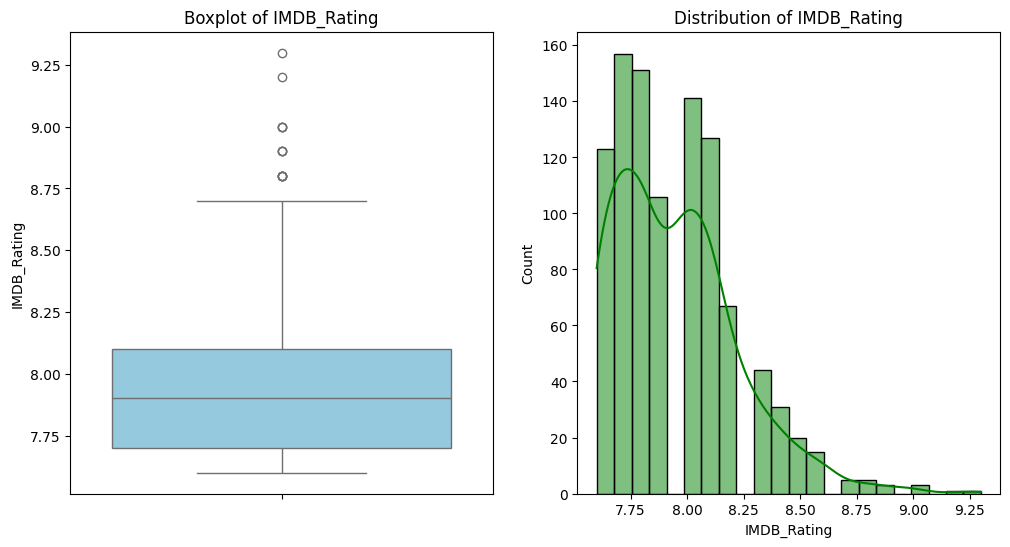

IMDB_Rating does not have a normal distribution (p-value: 0.0000).


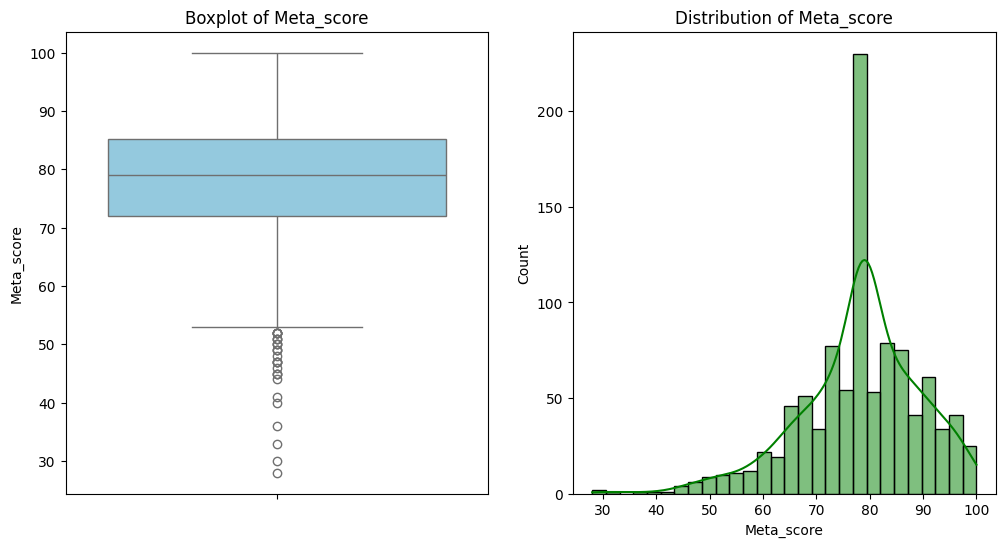

Meta_score does not have a normal distribution (p-value: 0.0000).


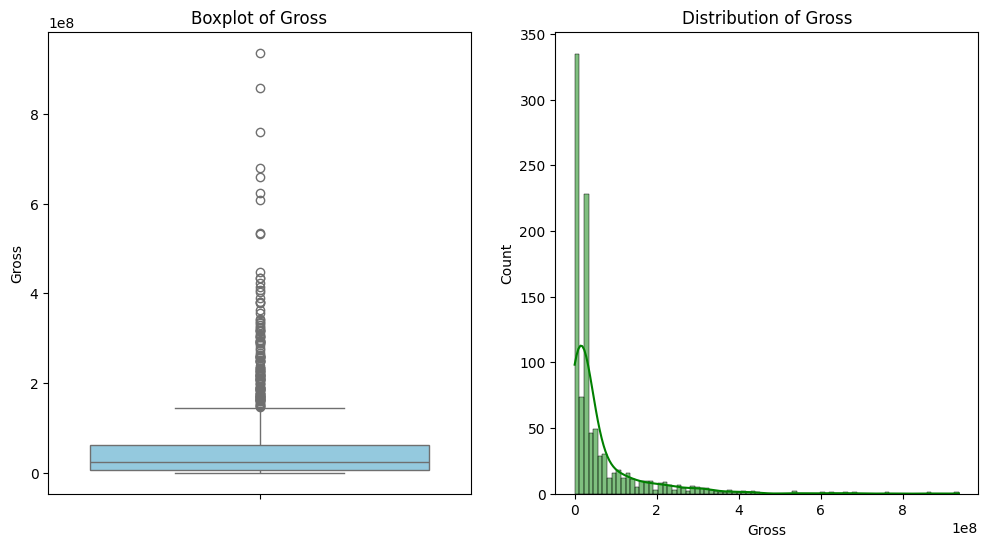

Gross does not have a normal distribution (p-value: 0.0000).


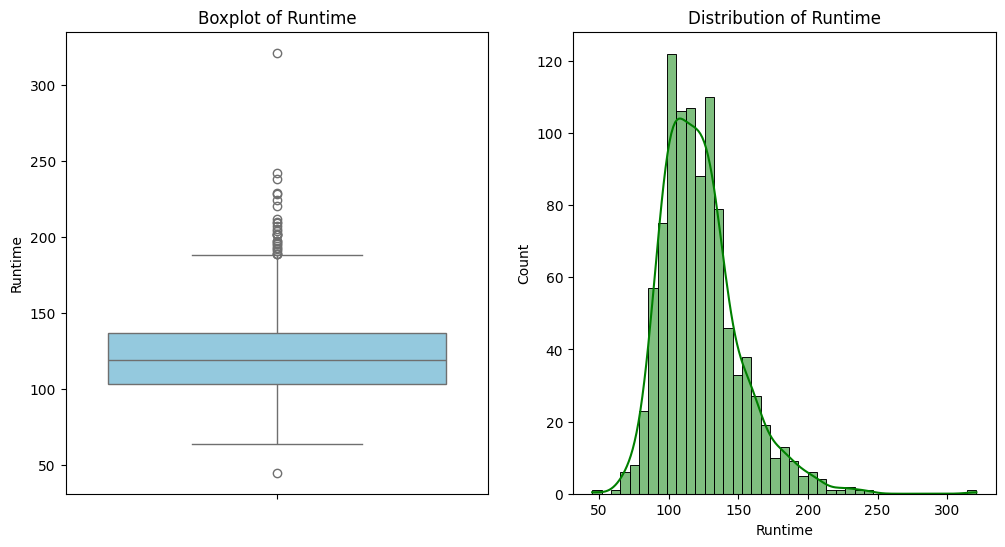

Runtime does not have a normal distribution (p-value: 0.0000).


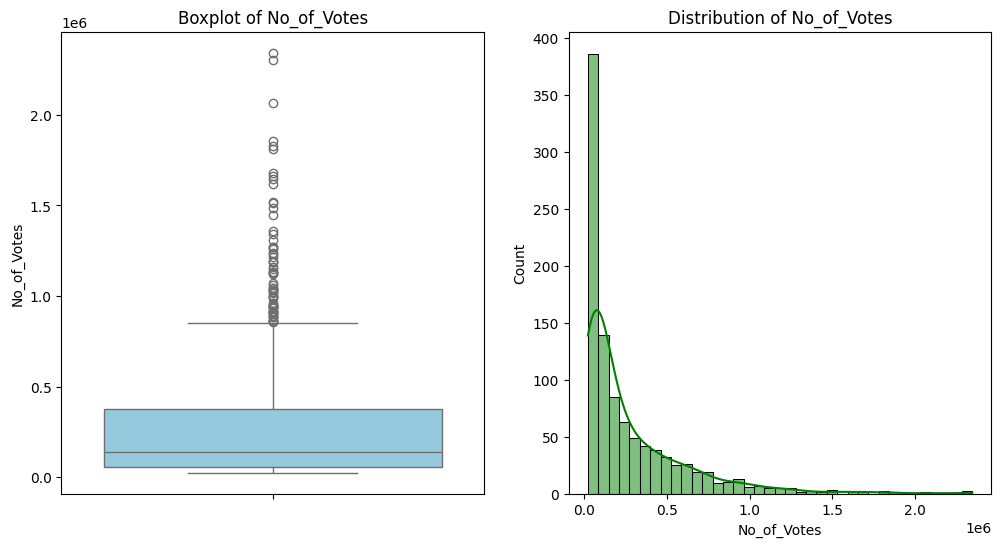

No_of_Votes does not have a normal distribution (p-value: 0.0000).


In [54]:
# Define numeric columns for analysis
numeric_columns = ['IMDB_Rating', 'Meta_score', 'Gross', 'Runtime', 'No_of_Votes']

# Plot boxplots and distribution plots for numeric variables
for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

    # Distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True, color='green')
    plt.title(f'Distribution of {column}')

    plt.show()

    # Normality Test
    stat, p = shapiro(data[column].dropna())
    if p > 0.05:
        print(f"{column} appears to have a normal distribution (p-value: {p:.4f}).")
    else:
        print(f"{column} does not have a normal distribution (p-value: {p:.4f}).")


C:\Users\Meesum Abbas\AppData\Local\Temp\ipykernel_13964\3286355113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


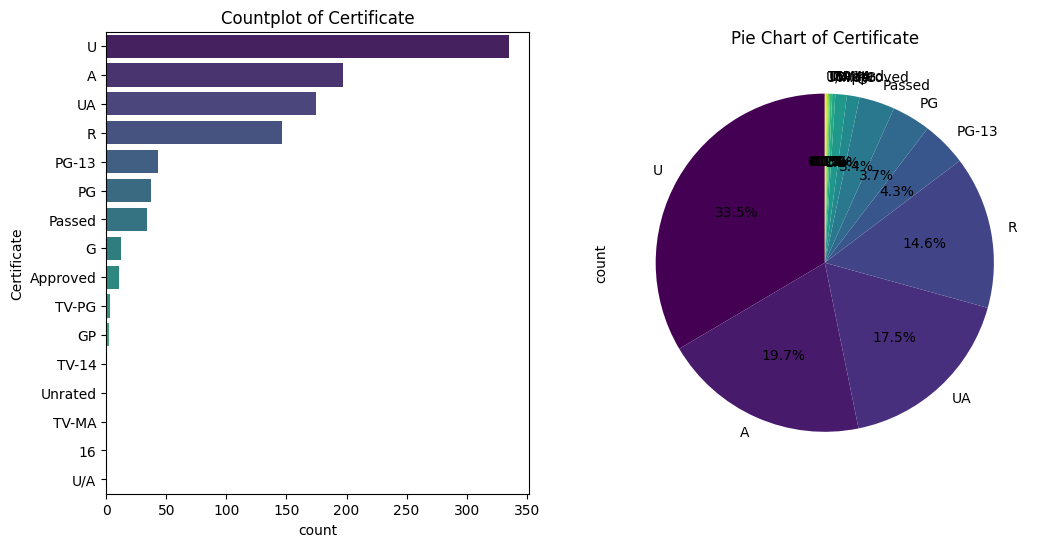

C:\Users\Meesum Abbas\AppData\Local\Temp\ipykernel_13964\3286355113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


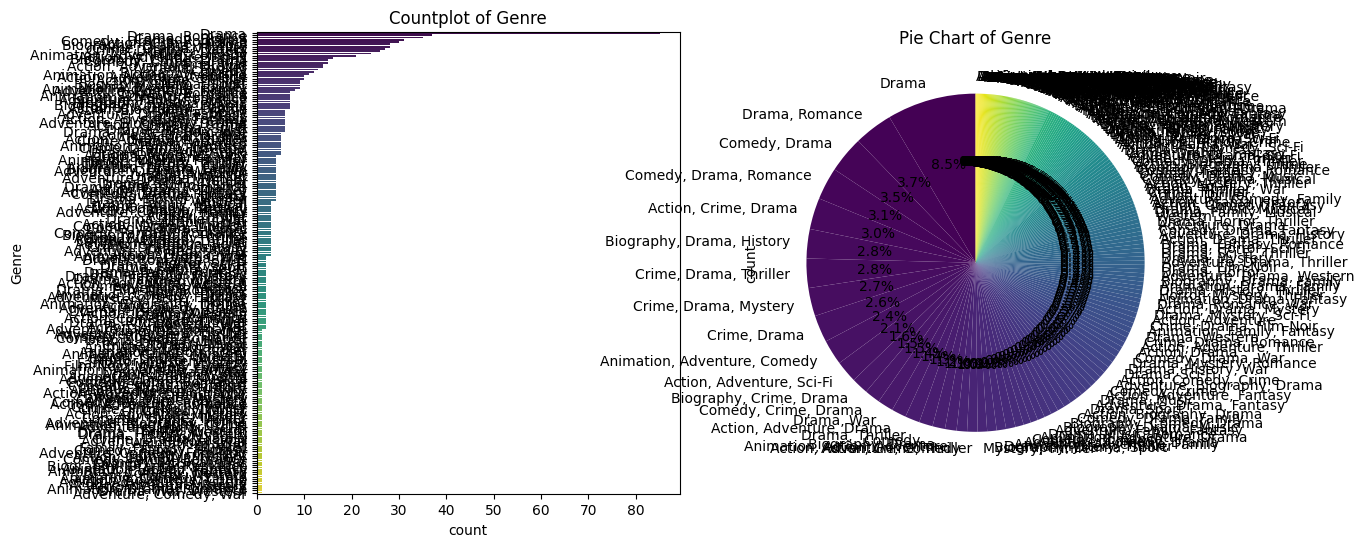

C:\Users\Meesum Abbas\AppData\Local\Temp\ipykernel_13964\3286355113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


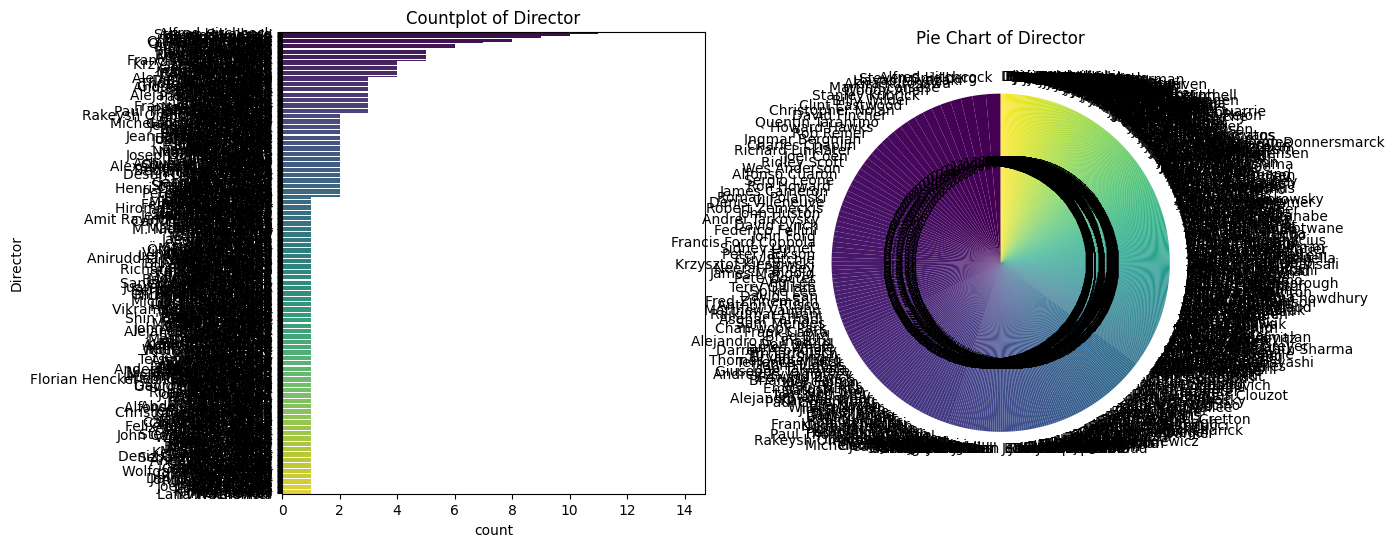

In [55]:
# Define categorical columns for analysis
categorical_columns = ['Certificate', 'Genre', 'Director']

# Plot applicable charts for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(12, 6))

    # Countplot
    plt.subplot(1, 2, 1)
    sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')
    plt.title(f'Countplot of {column}')

    # Pie Chart
    plt.subplot(1, 2, 2)
    data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Pie Chart of {column}')

    plt.show()

### Step C2: Bivariate Analysis

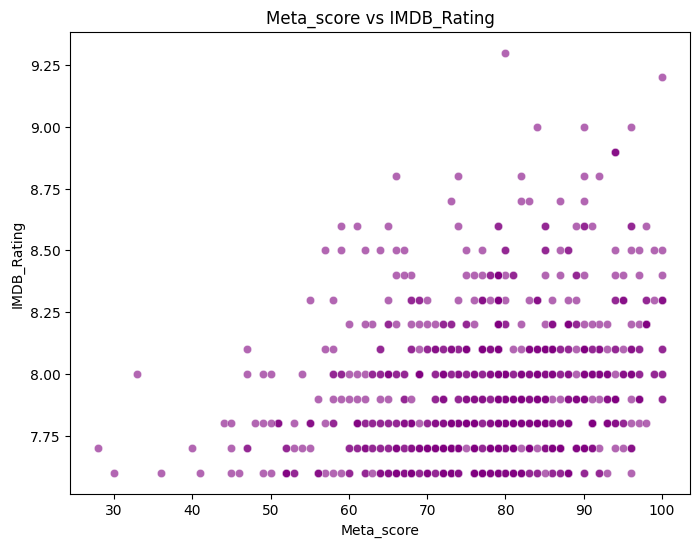

Correlation between Meta_score and IMDB_Rating: 0.2587


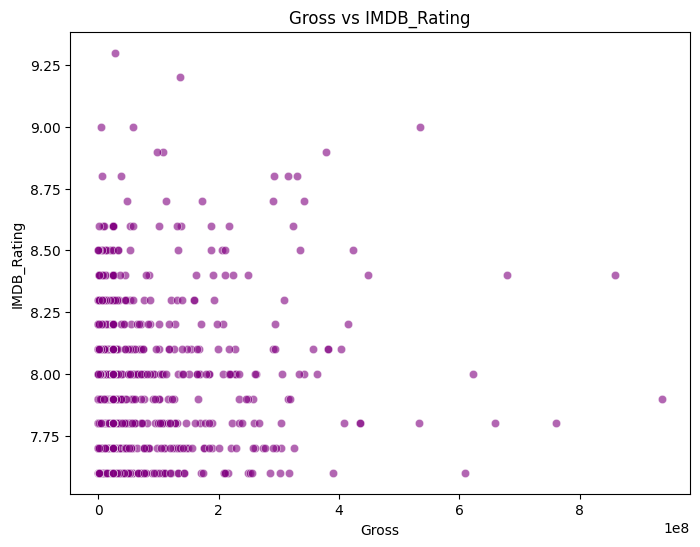

Correlation between Gross and IMDB_Rating: 0.0855


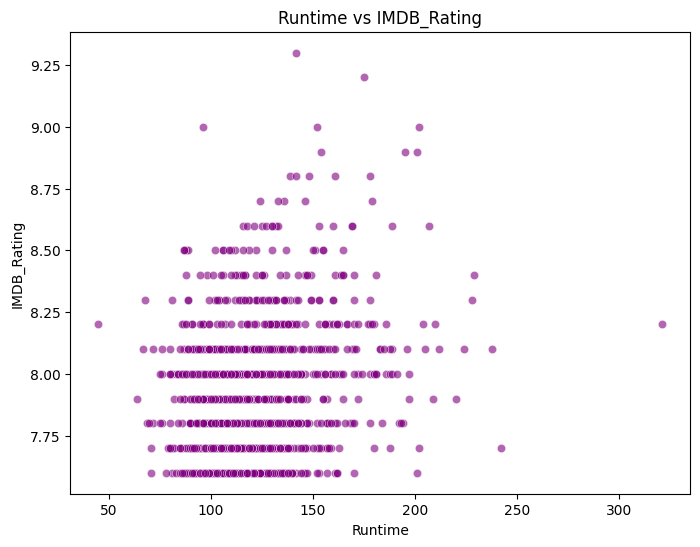

Correlation between Runtime and IMDB_Rating: 0.2431


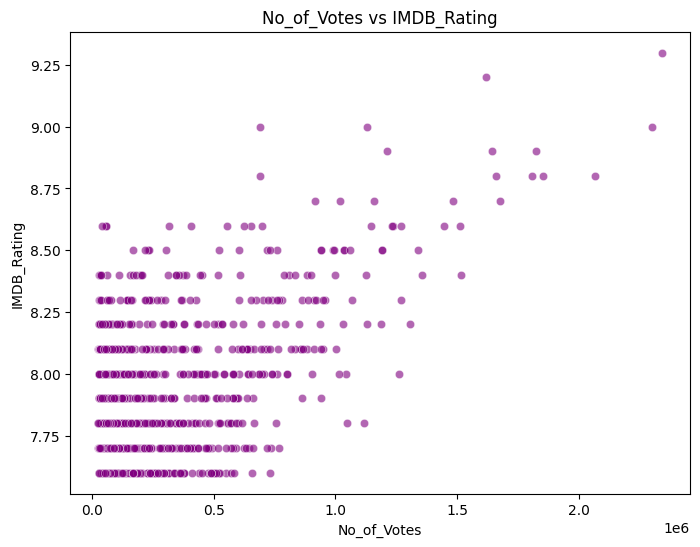

Correlation between No_of_Votes and IMDB_Rating: 0.4950

Feature Importance based on Bivariate Analysis:
Meta_score: Low correlation with IMDB_Rating (correlation: 0.2587). Its influence on IMDb ratings is limited.
Gross: Very low correlation with IMDB_Rating (correlation: 0.0855). Not strongly tied to IMDb ratings but still useful for revenue-related insights.
Runtime: Low correlation with IMDB_Rating (correlation: 0.2431). Slightly relevant for trend analysis.
No_of_Votes: Moderate correlation with IMDB_Rating (correlation: 0.4950). Indicates significant audience engagement and alignment with ratings.


In [56]:
# Define relevant columns for bivariate analysis
relevant_columns = ['Meta_score', 'Gross', 'Runtime', 'No_of_Votes']

# Scatterplots and correlation with IMDB_Rating
for column in relevant_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[column], y=data['IMDB_Rating'], alpha=0.6, color='purple')
    plt.title(f'{column} vs IMDB_Rating')
    plt.xlabel(column)
    plt.ylabel('IMDB_Rating')
    plt.show()

    # Correlation
    correlation = data[column].corr(data['IMDB_Rating'])
    print(f"Correlation between {column} and IMDB_Rating: {correlation:.4f}")

# Summarize feature importance based on bivariate analysis
print("\nFeature Importance based on Bivariate Analysis:")
print("Meta_score: Low correlation with IMDB_Rating (correlation: 0.2587). Its influence on IMDb ratings is limited.")
print("Gross: Very low correlation with IMDB_Rating (correlation: 0.0855). Not strongly tied to IMDb ratings but still useful for revenue-related insights.")
print("Runtime: Low correlation with IMDB_Rating (correlation: 0.2431). Slightly relevant for trend analysis.")
print("No_of_Votes: Moderate correlation with IMDB_Rating (correlation: 0.4950). Indicates significant audience engagement and alignment with ratings.")



### Step E: Preprocessing

In [57]:
# 1. Apply Discretization to Two Numeric Attributes
# Discretizing 'Gross' and 'Runtime' into 3 bins using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data['Gross_Discretized'] = discretizer.fit_transform(data[['Gross']])
data['Runtime_Discretized'] = discretizer.fit_transform(data[['Runtime']])

print("\nDiscretized 'Gross' and 'Runtime':")
print(data[['Gross_Discretized', 'Runtime_Discretized']].head())


Discretized 'Gross' and 'Runtime':
   Gross_Discretized  Runtime_Discretized
0                0.0                  1.0
1                0.0                  1.0
2                1.0                  1.0
3                0.0                  1.0
4                0.0                  0.0


In [58]:
# 2. Normalize Remaining Numeric Attributes
scaler = MinMaxScaler()
numeric_to_normalize = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Released_Year']
data[numeric_to_normalize] = scaler.fit_transform(data[numeric_to_normalize])

print("\nNormalized Numeric Attributes:")
print(data[numeric_to_normalize].head())


Normalized Numeric Attributes:
   IMDB_Rating  Meta_score  No_of_Votes  Released_Year
0     1.000000    0.722222     1.000000           0.74
1     0.941176    1.000000     0.688207           0.52
2     0.823529    0.777778     0.982797           0.88
3     0.823529    0.861111     0.476641           0.54
4     0.823529    0.944444     0.286778           0.37


In [62]:
# 3. One-Hot Encoding for Categorical Attributes

categorical_to_encode = ['Certificate', 'Genre', 'Director']
if all(col in data.columns for col in categorical_to_encode):
    data = pd.get_dummies(data, columns=categorical_to_encode, drop_first=True)
else:
    print(f"Some columns in {categorical_to_encode} are missing. Please check the DataFrame.")


print("\nData After One-Hot Encoding:")
print(data.head())

Some columns in ['Certificate', 'Genre', 'Director'] are missing. Please check the DataFrame.

Data After One-Hot Encoding:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year  Runtime  IMDB_Rating  \
0  The Shawshank Redemption           0.74    142.0     1.000000   
1             The Godfather           0.52    175.0     0.941176   
2           The Dark Knight           0.88    152.0     0.823529   
3    The Godfather: Part II           0.54    202.0     0.823529   
4              12 Angry Men           0.37     96.0     0.823529   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...    0.7222

In [63]:
# 4. Split Dataset into Train and Test Sets
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

print("\nTrain Set Shape:", train_set.shape)
print("Test Set Shape:", test_set.shape)


Train Set Shape: (700, 778)
Test Set Shape: (300, 778)
